<a href="https://colab.research.google.com/github/naveen-sachithanandam/ml_basics/blob/main/MLBasics_RegressionProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

In this project we will analyze the **Student Performance** dataset from kaggle and build Linear Regrassion model to predict the students' exam scores.

Goals:

*  Understand how demographic and socio-economic factors affect performance
*  Use linear regresssion to predict math score.
*  Evaluate the model performance and accuracy of the score.

## Dataset Used: Student Performance from Kaggle: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data

In [1]:
## Setting Up Kaggle
! pip install -q kaggle
! mkdir -p ~/.kaggle
! cp '/content/kaggle.json' ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json
! ls -l ~/.kaggle

total 4
-rw------- 1 root root 76 Oct 25 14:21 kaggle.json


In [2]:
### Importing required libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle

In [3]:
# Loading Dataset in using pandas
kaggle.api.dataset_download_files('spscientist/students-performance-in-exams', path='./data', unzip=True)
df = pd.read_csv('/content/data/StudentsPerformance.csv')

## Print the top rows
df.head()

## Info about the Data Frame
df.info()

## Get Shape of data frame
df.shape


Dataset URL: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


(1000, 8)

In [4]:
## Check Null Values in the Data
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


### Explore the Data Analysis (EDA)

<Axes: xlabel='math score', ylabel='Count'>

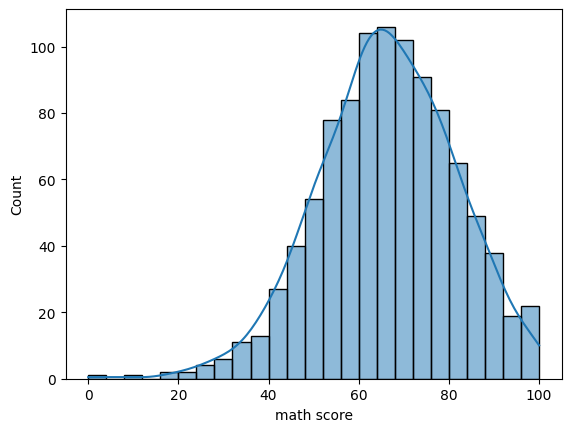

In [5]:
### Math Score
sns.histplot(df['math score'], kde=True)

**'math-score'** is left skewed

<Axes: xlabel='reading score', ylabel='Count'>

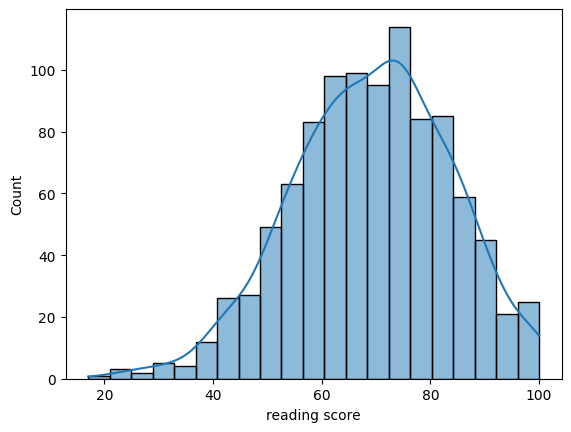

In [6]:
### Reading Score
sns.histplot(df['reading score'], kde=True)

**'reading-score'** is left skewed

<Axes: xlabel='writing score', ylabel='Count'>

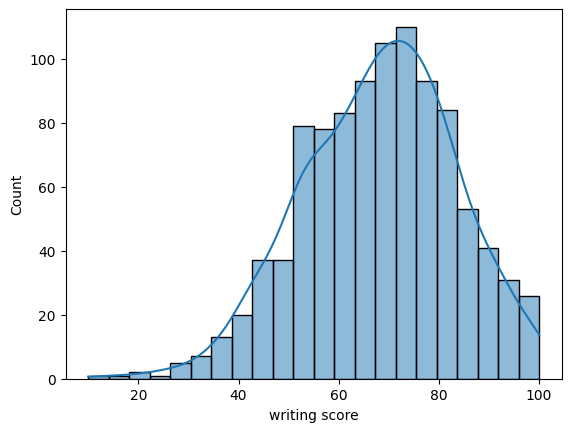

In [7]:
### Writing Score
sns.histplot(df['writing score'], kde=True)

**'writing-score'** is left skewed

#### Let us perform gender analysis.

Text(0.5, 1.0, 'Average Writing Score by Gender')

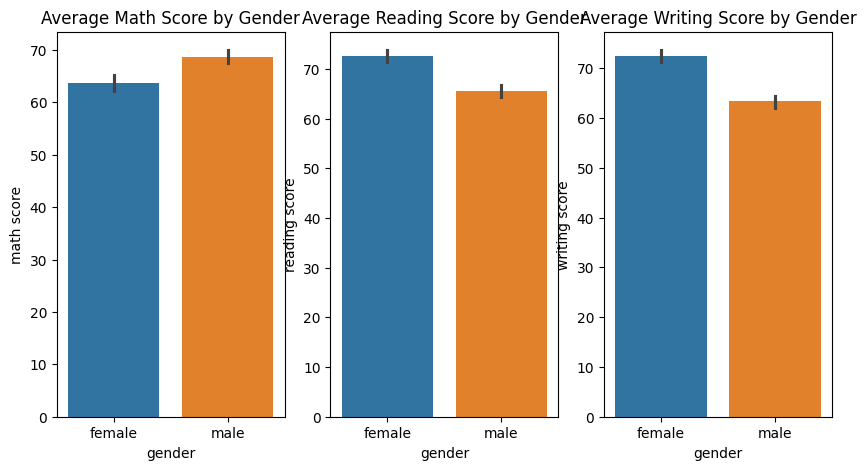

In [8]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.barplot(data = df, x ="gender", y = "math score", hue ="gender")
plt.title('Average Math Score by Gender')

plt.subplot(1,3,2)
sns.barplot(data = df, x ="gender", y = "reading score", hue ="gender")
plt.title('Average Reading Score by Gender')

plt.subplot(1,3,3)
sns.barplot(data = df, x ="gender", y = "writing score", hue ="gender")
plt.title('Average Writing Score by Gender')

Average Math Score is higher in male
Average Reading and Writing scores are higher in female

### Race and Ethinicity Analysis

Text(0.5, 1.0, 'Avg Math Score by Race/Enthinicity')

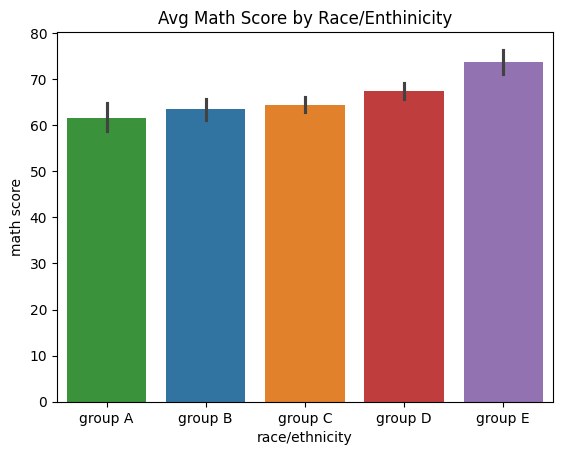

In [9]:
sns.barplot(data=df, x= "race/ethnicity", y= "math score", order = sorted(df['race/ethnicity'].unique()), hue = "race/ethnicity")
plt.title('Avg Math Score by Race/Enthinicity')


*'Group E'* has the highest score in Math & 'Group A' has the lowest score in Math.

---



Text(0.5, 1.0, 'Avg Reading Score by Race/Enthinicity')

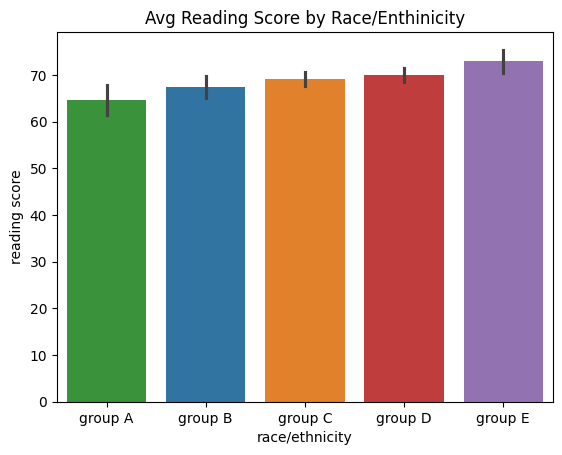

In [10]:
sns.barplot(data=df, x= "race/ethnicity", y= "reading score", order = sorted(df['race/ethnicity'].unique()), hue = "race/ethnicity")
plt.title('Avg Reading Score by Race/Enthinicity')

*'Group E'* has the highest score in Reading & 'Group A' has the lowest score in Reading.

Text(0.5, 1.0, 'Avg Writing Score by Race/Enthinicity')

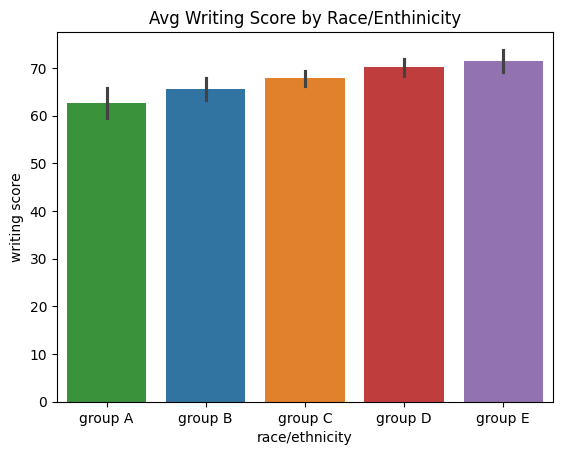

In [11]:
sns.barplot(data=df, x= "race/ethnicity", y= "writing score", order = sorted(df['race/ethnicity'].unique()), hue = "race/ethnicity")
plt.title('Avg Writing Score by Race/Enthinicity')

*'Group E'* has the highest score in Writing & 'Group A' has the lowest score in Writing.

### Let us analyse the Parental Education

<Axes: title={'center': 'Avg Math score by parental level of education.'}, xlabel='parental level of education', ylabel='math score'>

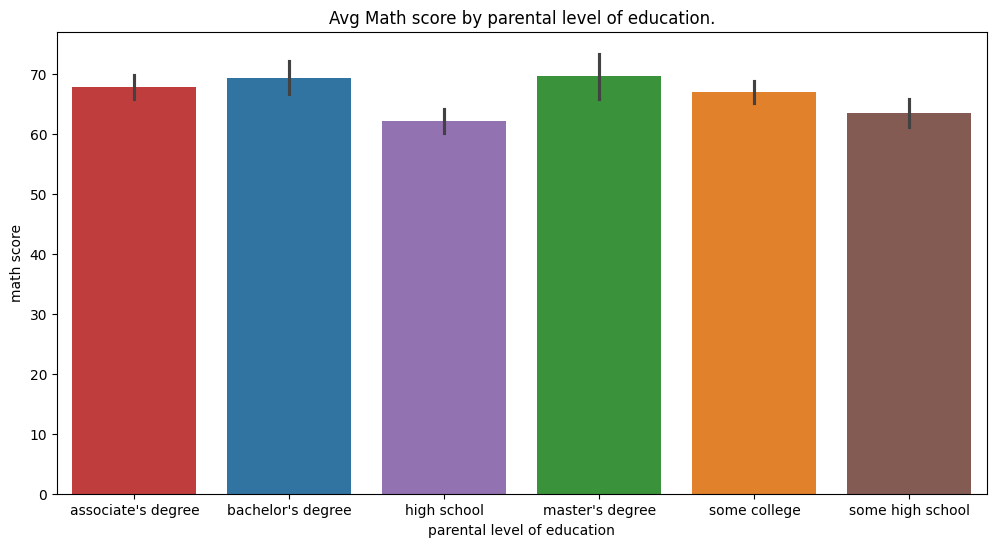

In [12]:
plt.figure(figsize=(12,6))
plt.subplot(1,1,1)
plt.title('Avg Math score by parental level of education.')
sns.barplot(data=df, x= "parental level of education", y= "math score", order = sorted(df['parental level of education'].unique()), hue = "parental level of education")

Children with parents having masters' degree have the highest math score.

Children with parents having high school education have the lowest match score.

<Axes: title={'center': 'Avg Reading score by parental level of education.'}, xlabel='parental level of education', ylabel='reading score'>

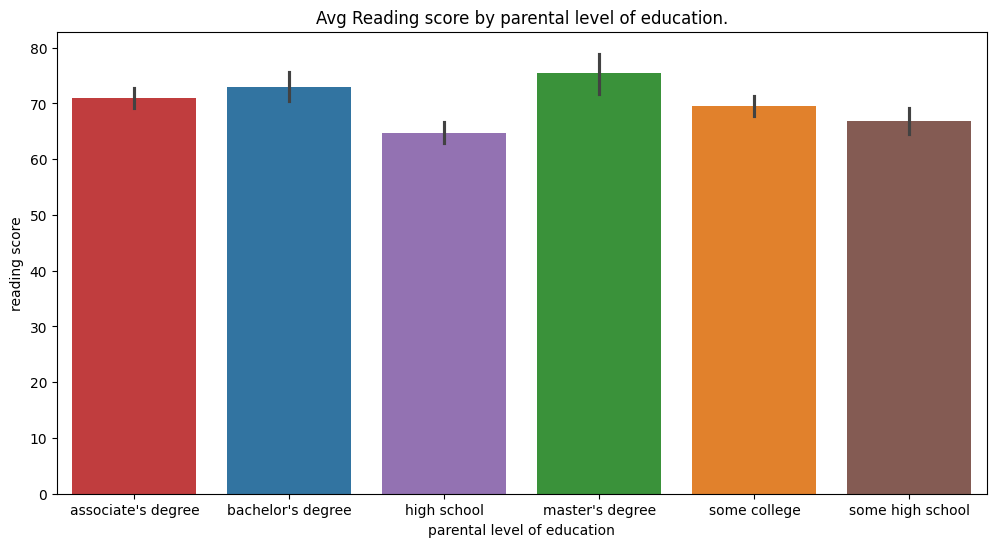

In [13]:
plt.figure(figsize=(12,6))
plt.subplot(1,1,1)
plt.title('Avg Reading score by parental level of education.')
sns.barplot(data=df, x= "parental level of education", y= "reading score", order = sorted(df['parental level of education'].unique()), hue = "parental level of education")

Children with parents having masters' degree have the highest reading score.

Children with parents having high school education level have the lowest reading score.

<Axes: title={'center': 'Avg Writing score by parental level of education.'}, xlabel='parental level of education', ylabel='writing score'>

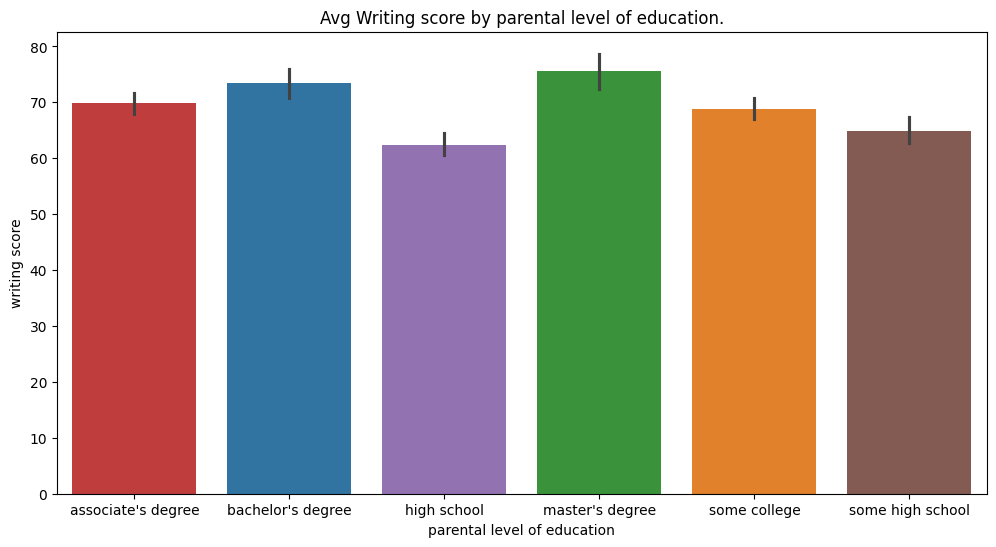

In [14]:
plt.figure(figsize=(12,6))
plt.subplot(1,1,1)
plt.title('Avg Writing score by parental level of education.')
sns.barplot(data=df, x= "parental level of education" , y = "writing score", order = sorted(df['parental level of education'].unique()), hue = "parental level of education")

Children having parents with masters' degree have highest writing score.

Children having parents with high school education have the lowest writing score.

### Let us analyse the lunch Type vs Score

<Axes: title={'center': 'Avg Writing score by lunch type.'}, xlabel='lunch', ylabel='writing score'>

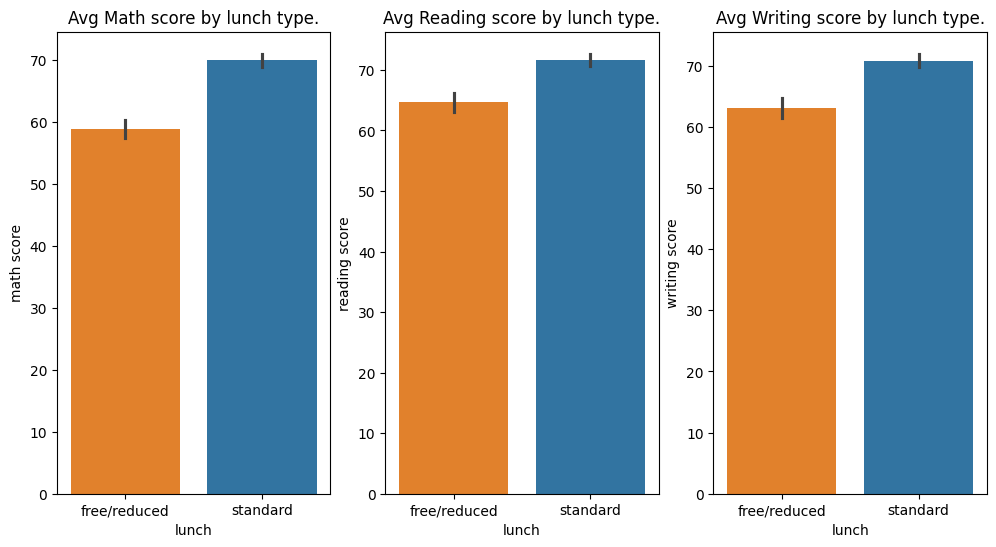

In [15]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.title('Avg Math score by lunch type.')
sns.barplot(data=df, x= "lunch" , y = "math score", order = sorted(df['lunch'].unique()), hue = "lunch")

plt.subplot(1,3,2)
plt.title('Avg Reading score by lunch type.')
sns.barplot(data=df, x= "lunch" , y = "reading score", order = sorted(df['lunch'].unique()), hue = "lunch")

plt.subplot(1,3,3)
plt.title('Avg Writing score by lunch type.')
sns.barplot(data=df, x= "lunch" , y = "writing score", order = sorted(df['lunch'].unique()), hue = "lunch")

Children with standard lunch performed better in Math, Reading and Writing.

## Process Data

In [16]:
X = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']]
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


In [17]:
y = df[['math score']]
y.head()

,math score
0,72
1,69
2,90
3,47
4,76


In [18]:
#Check for Missing Values
X.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0


In [19]:
#Check for missing Y Values
y.isnull().sum()

,0
math score,0


In [20]:
# Encoding Categorical Variables.
X_encoded = pd.get_dummies(X, drop_first= True)
X_encoded.head()

,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,False,True,False,False,False,True,False,False,False,False,True,True
1,False,False,True,False,False,False,False,False,True,False,True,False
2,False,True,False,False,False,False,False,True,False,False,True,True
3,True,False,False,False,False,False,False,False,False,False,False,True
4,True,False,True,False,False,False,False,False,True,False,True,True


In [21]:
X_encoded.shape

(1000, 12)

In [22]:
## Create Average Score
df['average_score'] = df[['math score','reading score' , 'writing score']].mean(axis=1).astype(int)
df[['math score', 'reading score', 'writing score', 'average_score']].sample(6)

,math score,reading score,writing score,average_score
195,61,55,52,56
669,81,72,77,76
506,68,70,66,68
584,69,77,77,74
378,71,83,77,77
196,59,69,65,64


In [23]:
## Create a performance level column
df['performance_level'] = pd.cut(df['average_score'], bins=[0, 60, 70, 80, 90, 100], labels=['Poor', 'Fair', "Good", "Very Good", "Excellent"])
df[['average_score', 'performance_level']].tail(4)

,average_score,performance_level
996,57,Poor
997,65,Fair
998,74,Good
999,83,Very Good


In [24]:
## Encoding Data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for col in df_columns:
  df[col] = le.fit_transform(df[col])

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,performance_level
0,0,1,1,1,1,72,72,74,72,Good
1,0,2,4,1,0,69,90,88,82,Very Good
2,0,1,3,1,1,90,95,93,92,Excellent
3,1,0,0,0,1,47,57,44,49,Poor
4,1,2,4,1,1,76,78,75,76,Good


### Split Train and Test Set

In [25]:
from sklearn.model_selection import train_test_split

x= df.drop(['average_score', 'performance_level'], axis = 1)
y= df['average_score']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 111)

print("Training Set: ", X_train.shape, y_train.shape)
print("Test Set: ", X_test.shape, y_test.shape)

Training Set:  (800, 8) (800,)
Test Set:  (200, 8) (200,)


Linear Regression

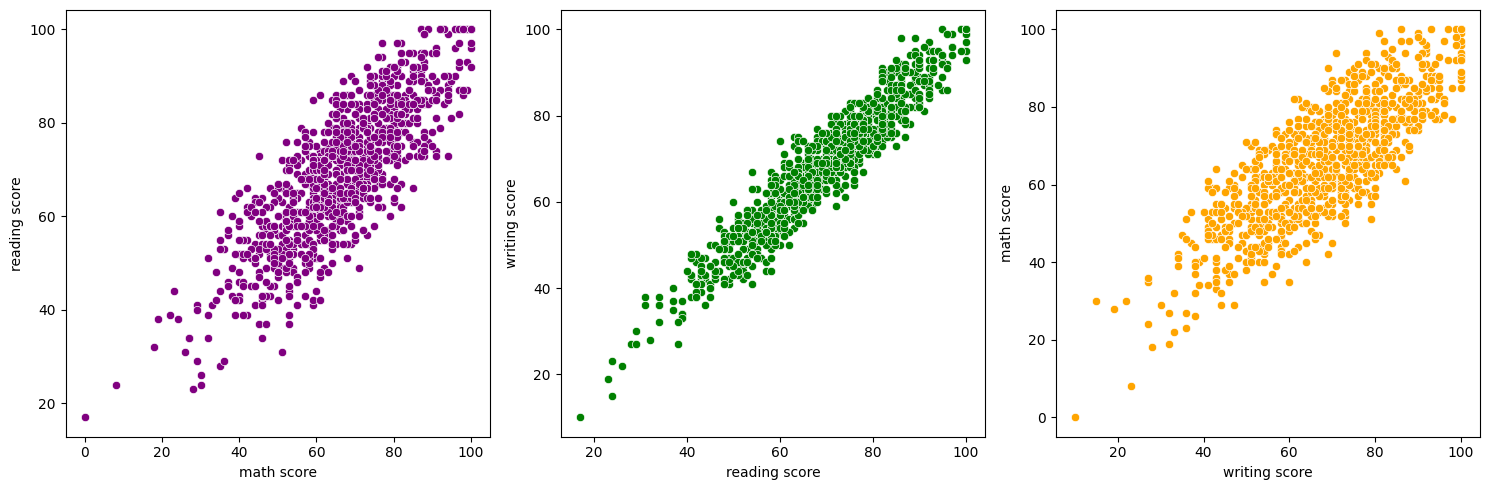

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.scatterplot(data = df, x='math score', y='reading score', ax= axes[0], color = 'purple')
sns.scatterplot(data = df, x='reading score', y='writing score', ax= axes[1], color = 'green')
sns.scatterplot(data = df, x='writing score', y='math score', ax= axes[2], color = 'orange')
plt.tight_layout()

# Model Training

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
coef = model.coef_
intercept = model.intercept_

print("Coefficient: ", coef)
print("Intercept: ", intercept)

Coefficient:  [ 0.00836535  0.00313043  0.00633202  0.01640273 -0.00889423  0.33419036
  0.33298079  0.3332517 ]
Intercept:  -0.38503615706392225


In [37]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# Model Evaluation

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
r2_train = r2_score(y_train,pred_train)
mae = mean_absolute_error(y_train, pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))

In [39]:
print("Training Performance")
print(f"R2: {r2_train:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse_train:.4f}")

Training Performance
R2: 0.9996
MAE: 0.2282
RMSE: 0.2723


### Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor
modelrf=RandomForestRegressor(n_estimators= 200, random_state=42)
modelrf.fit(X_train, y_train)
y_pred2 = modelrf.predict(X_test)


Training Performance
R2: 0.9996
MAE: 0.2282
RMSE: 0.2723


In [41]:
r2_train = r2_score(y_test,y_pred2)
mae = mean_absolute_error(y_test,y_pred2)
rmse_train = np.sqrt(mean_squared_error(y_test,y_pred2))

print("Training Performance")
print(f"R2: {r2_train:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse_train:.4f}")

Training Performance
R2: 0.9942
MAE: 0.5489
RMSE: 1.0667


# Feature Importance

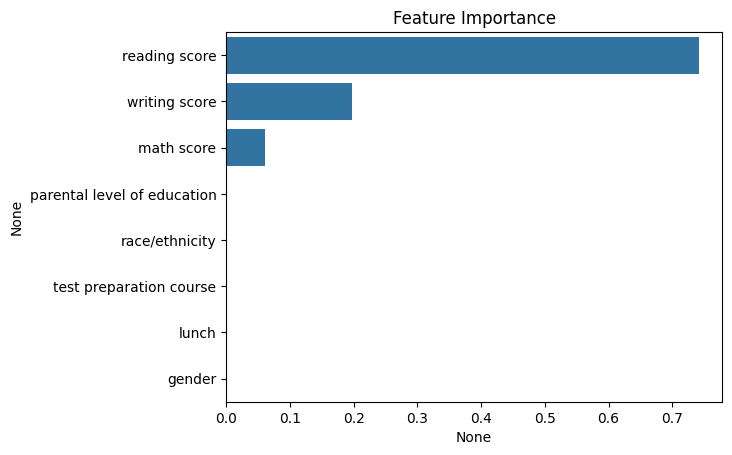

In [45]:
importances = pd.Series(modelrf.feature_importances_, index = x.columns).sort_values(ascending= False)

sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance")
plt.show()

### Actual Vs Predicted

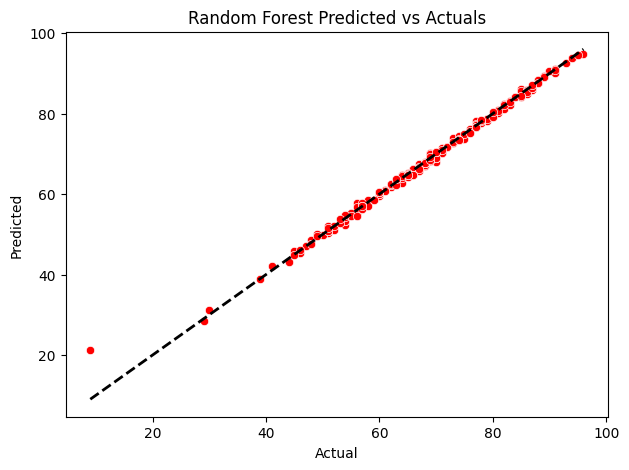

In [46]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred2, color = "red")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw= 2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random Forest Predicted vs Actuals")
plt.show()

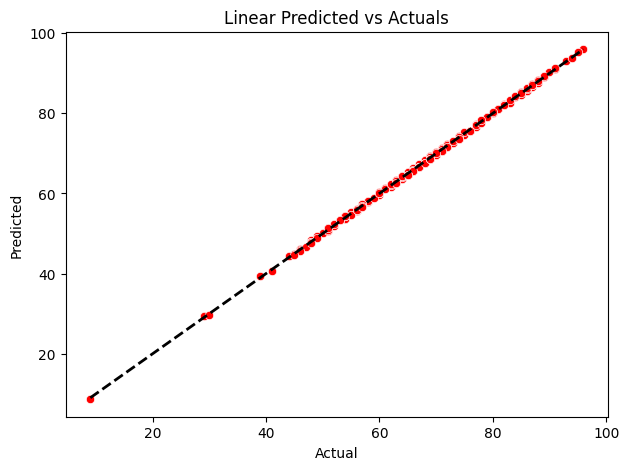

In [47]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=pred_test, color = "red")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw= 2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Predicted vs Actuals")
plt.show()